 , hu.39
 |
 | rh.50
 |
_, rh.49
 |
 |_ rh.57
 |
 | rh.51
 |
 , rh.53
 |
 | rh.64
 |
 , rh.52
 |
 , rh.61
 |
 | __ rh.58
 ||
 ||                                                    , pi.2
 ||                  __________________________________|
 ||                 |                                  |_ pi.3
 ||                 |                                  |
 ||                 |                                  | pi.1
 ||                 |
 ||                 |                   __ hu.17
 ||              ___|                 _|
 ||             |   |                | | hu.6
 ||             |   |    ____________|
 ||             |   |   |            |  , rh.10
 ||             |   |   |            |__|
  |             |   |   |               |, bb.1
  |             |   |___|               ||
  |             |       |                | bb.2
  |             |       |
  |             |       |       ___________ rh.2
  |             |       |      |
  |             |       |______|        

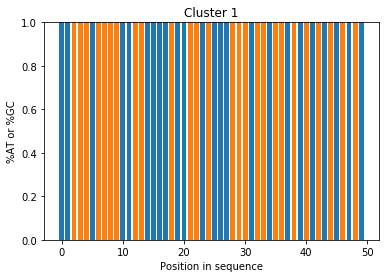

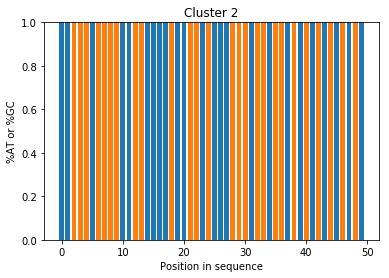

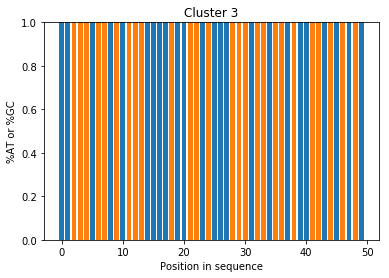

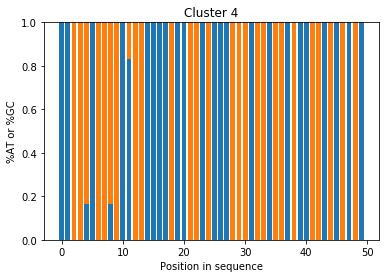

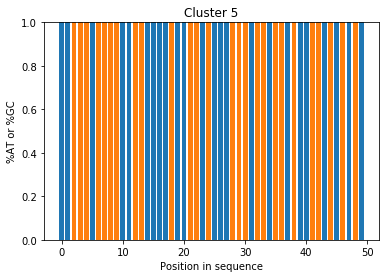

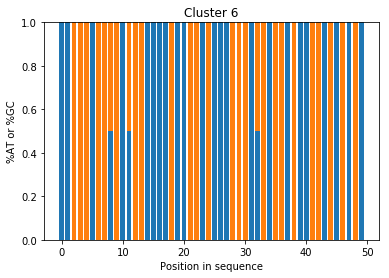

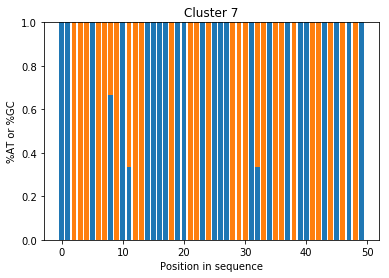

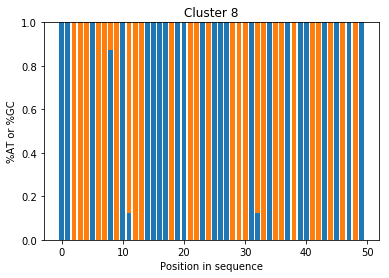

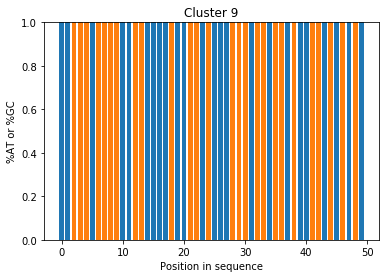

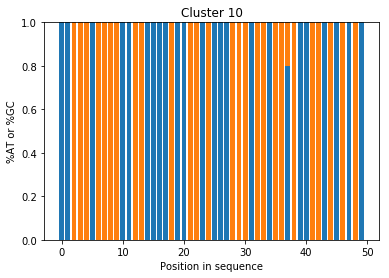

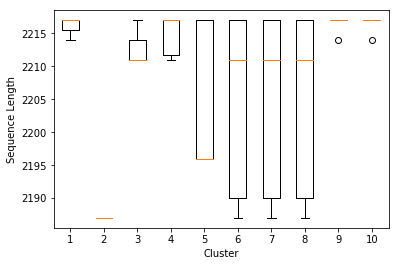

In [56]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Phylo
from Bio import Cluster
from Bio.Cluster import treecluster
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# total_pos is the number of positions considered for the AT/CG fraction - this may be changed
total_pos = 50

# Create phylogenetic tree
tree = Phylo.read('tree.nwk', 'newick')
tree.ladderize() 
Phylo.draw_ascii(tree, file=None, column_width =125)

# Create lists for both aligned and non-aligned specimen sequences. The latter will be used for sequence length.
record_aligned =  list(SeqIO.parse('seqs.aligned.fa','fasta'))
record = list(SeqIO.parse('seqs.fa','fasta'))

# Select one representative of each cluster - gene is determined using BLAST
cluster_list = ['hu.31','hu.44','pi.3','rh.43','rh.58','bb.1','rh.2','cy.2','rh.35','cy.4']

# cluster_len lists the lengths of each unaligned sequence in each cluster
cluster_len=[]

for i in range(len(record_aligned)):
    specimen = record_aligned[i]
    sequence = specimen.seq
    
    # If specimen is cluster representative, start new cluster statistics
    if specimen.id in cluster_list:
        # seq_lengths contains the lenghts of all sequences in cluster
        # AT[i] the number of A and Ts at position i for sequences in the cluster
        # CG[i] the number of C and Gs at position i for sequences in the cluster
        seq_lengths = []
        AT = [0]*total_pos
        CG = [0]*total_pos
    
    # Get sequence length and scan for AT or GC in first total_pos positions of specimen sequence
    seq_lengths.append(len(record[i]))
    for pos in range(total_pos):
        if sequence[pos]=='A' or sequence[pos]=='T':
            AT[pos]+=1
        if sequence[pos]=='C' or sequence[pos]=='G':
            CG[pos]+=1
        
    # If cluster analysis is complete, plot cluster stats and append all sequence lengths from the cluster to cluster_len
    # which will be used for the box plot
    if i == len(record)-1 or record[i+1].id in cluster_list:
        cluster_len.append(seq_lengths)
        # Calculate AT and GC fraction for each position 
        AT_f = [AT[i]/ (AT[i]+CG[i]) for i in range(total_pos)]
        CG_f = [CG[i]/ (AT[i]+CG[i]) for i in range(total_pos)]
        p1 = plt.bar([i for i in range(total_pos)], AT_f)
        p2 = plt.bar([i for i in range(total_pos)], CG_f, bottom = AT_f)
        plt.ylabel('%AT or %GC')
        plt.xlabel('Position in sequence')
        plt.title('Cluster ' + str(len(cluster_len)))
        plt.show()

# Create and display box plot for sequence length in each cluster        
fig, ax = plt.subplots()

ax.set_xlabel("Cluster")
ax.set_ylabel("Sequence Length")

boxplot_dict = ax.boxplot(
    cluster_len,
    labels = [str(i+1) for i in range(len(cluster_len))]
    )